In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/a/Desktop/machine learning practice/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Exploration

In [4]:
df.shape

(1000, 8)

In [5]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean score                   1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
df.describe()

,math score,reading score,writing score,mean score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.762000
std,15.16308,14.600192,15.195657,14.258354
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.000000
50%,66.00000,70.000000,69.000000,68.000000
75%,77.00000,79.000000,79.000000,78.000000
max,100.00000,100.000000,100.000000,100.000000


In [8]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

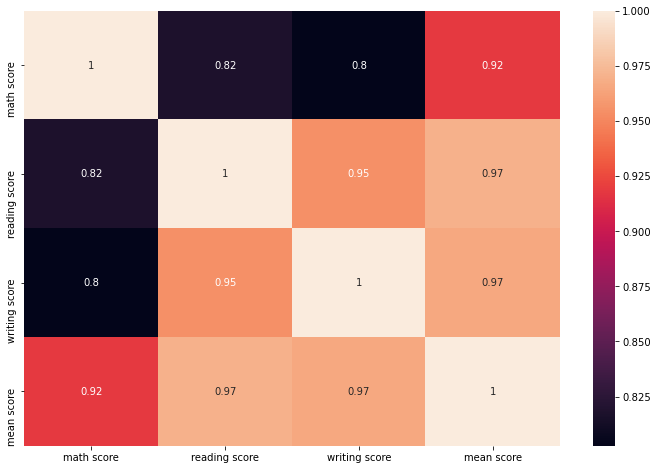

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

There is not much correlation, it seems most of the students are avg in all math, reading and writing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B6B889430>,
      dtype=object)

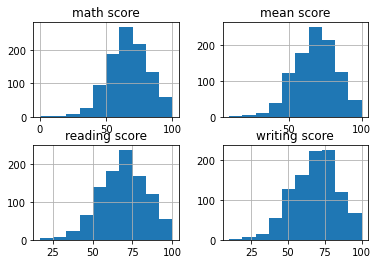

In [10]:
df.hist()

Also most of the data seems equally distributed. (little skewed right but not that effective)

### EDA

Let's explore Categorical Data

In [11]:
def Grade(meanscore):
    if (meanscore >= 80):return 'A'
    if (meanscore >= 70):return 'B'
    if (meanscore >= 60):return 'C'
    if (meanscore >= 50):return 'D'
    if (meanscore >= 40):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["mean score"]), axis=1)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,B
1,female,group C,some college,standard,completed,69,90,88,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,E
4,male,group C,some college,standard,none,76,78,75,76.0,B


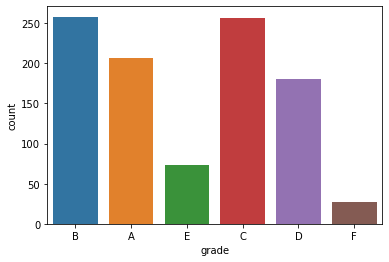

In [13]:
sns.countplot(x='grade',data=df)

Here we can say that group B and group C scores more

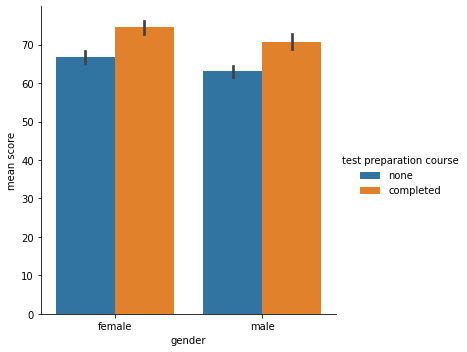

In [14]:
sns.catplot(x="gender",y="mean score",hue="test preparation course",data=df,kind="bar",height=5);

Students who have completed test preparation course have scored more.

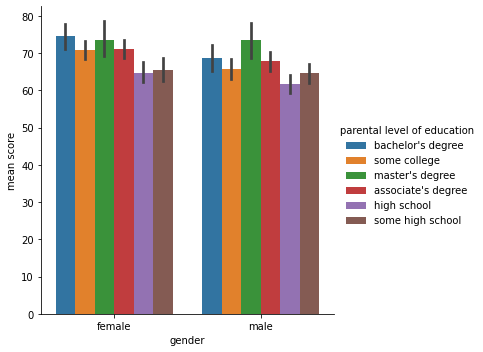

In [15]:
sns.catplot(x="gender",y="mean score",hue="parental level of education",data=df,kind="bar",height=5);

Fema with a bachelors and Masters degree are more successful and male having masters degree tops in list followed by bachelors.


race/ethnicity
group A    62.955056
group B    65.484211
group C    67.122257
group D    69.179389
group E    72.714286
Name: mean score, dtype: float64

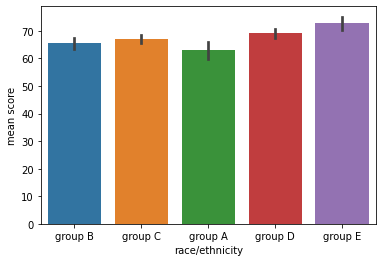

In [16]:
sns.barplot(x='race/ethnicity',y='mean score',data=df);
df.groupby("race/ethnicity")["mean score"].mean()

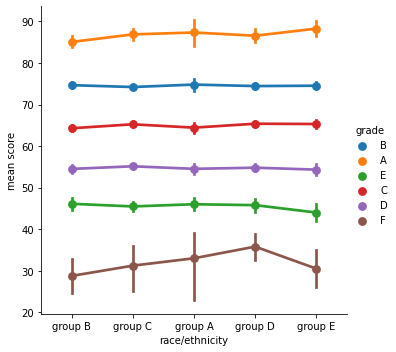

In [17]:
sns.catplot(x="race/ethnicity",y="mean score",hue="grade",kind="point",data=df);

If you look at "group E" carefully, we can see that the number of students with low grades is low, but the number of students with high grades is high

Group E tops the list with scoring more marks

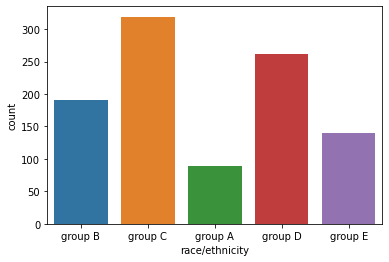

In [18]:
sns.countplot(x='race/ethnicity',data=df)

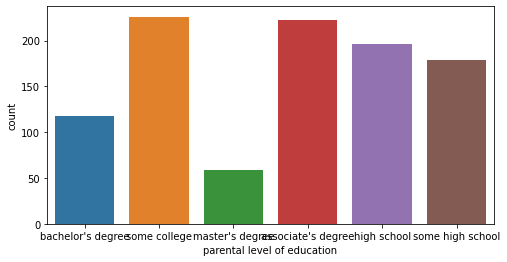

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x='parental level of education',data=df)

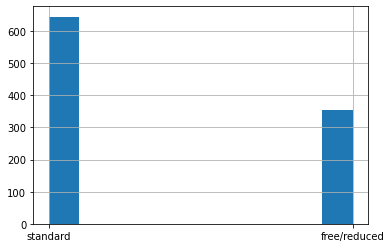

In [20]:
df['lunch'].hist();

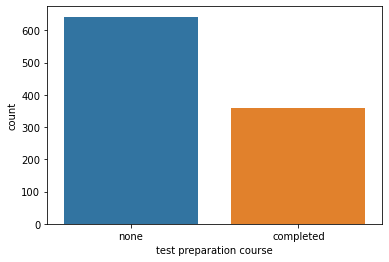

In [21]:
sns.countplot(x='test preparation course', data=df)

Test preparation course results that, the one who completed test preparation scores less

#### Let's explore numeric data

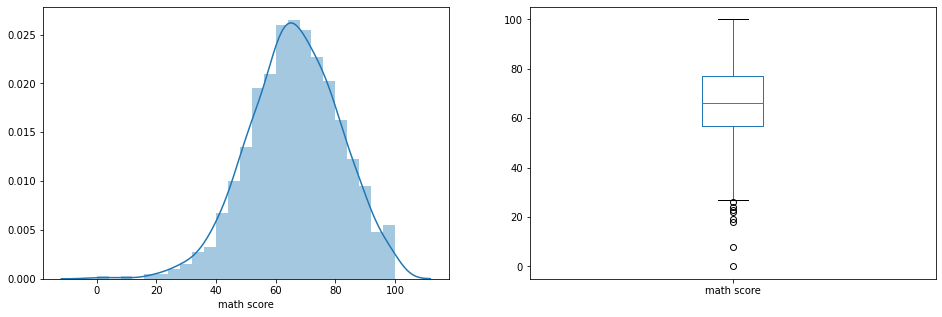

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['math score']); 
plt.subplot(122) 
df['math score'].plot.box(figsize=(16,5))
plt.show()

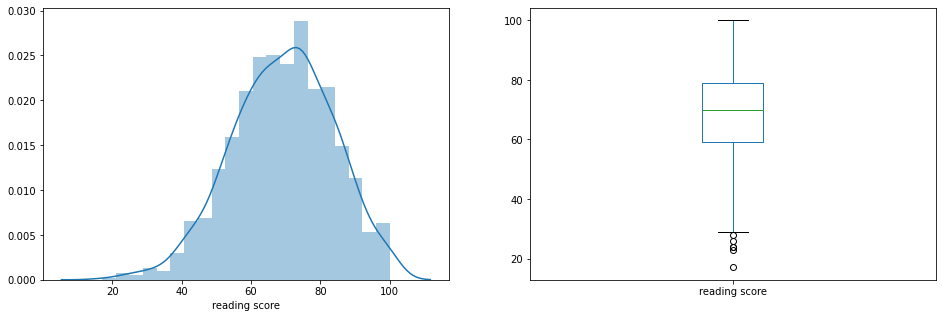

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['reading score']); 
plt.subplot(122) 
df['reading score'].plot.box(figsize=(16,5))
plt.show()

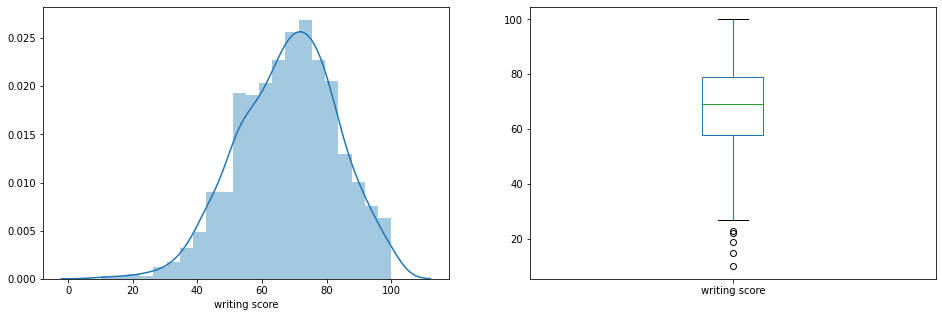

In [24]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['writing score']); 
plt.subplot(122) 
df['writing score'].plot.box(figsize=(16,5))
plt.show()

### Numeric-Numeric

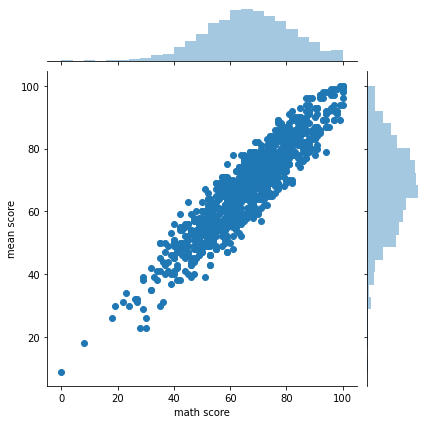

In [25]:
sns.jointplot(x = 'math score', y='mean score',data=df)

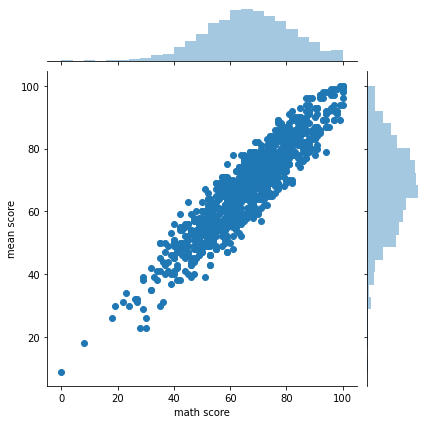

In [26]:
sns.jointplot(x = 'math score', y='mean score',data=df)

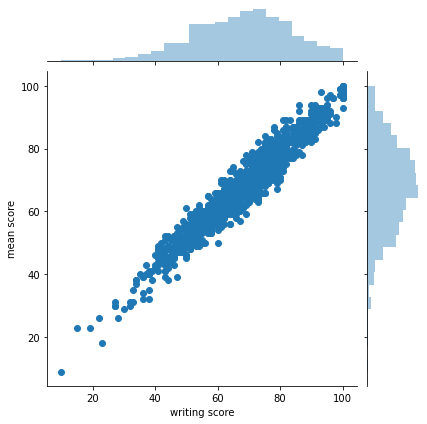

In [27]:
sns.jointplot(x = 'writing score', y='mean score',data=df)

### Categ-Categ

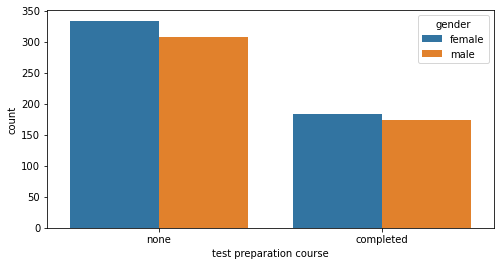

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x='test preparation course', hue='gender', data=df)

### Numeric-Categ

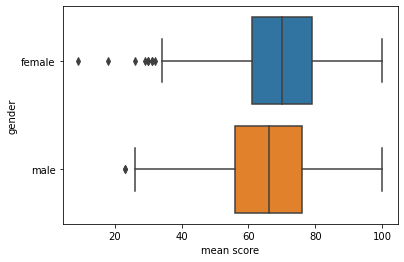

In [29]:
sns.boxplot(x='mean score', y='gender', data=df)

Here we can say that from numeric and interaction exploration, mostly female canditates tops the lists

### Data Cleaning

In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean score                     0
grade                          0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grade
0,0,1,1,1,1,72,72,74,73.0,B
1,0,2,4,1,0,69,90,88,82.0,A
2,0,1,3,1,1,90,95,93,93.0,A
3,1,0,0,0,1,47,57,44,49.0,E
4,1,2,4,1,1,76,78,75,76.0,B


In [32]:
df = df.drop('grade',axis=1)

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


### Model Building

In [34]:
X = df.drop('mean score', axis=1)
y = df['mean score']

In [35]:
X.shape, y.shape

((1000, 8), (1000,))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
tree.score(X_test, y_test)

0.9870371472783065